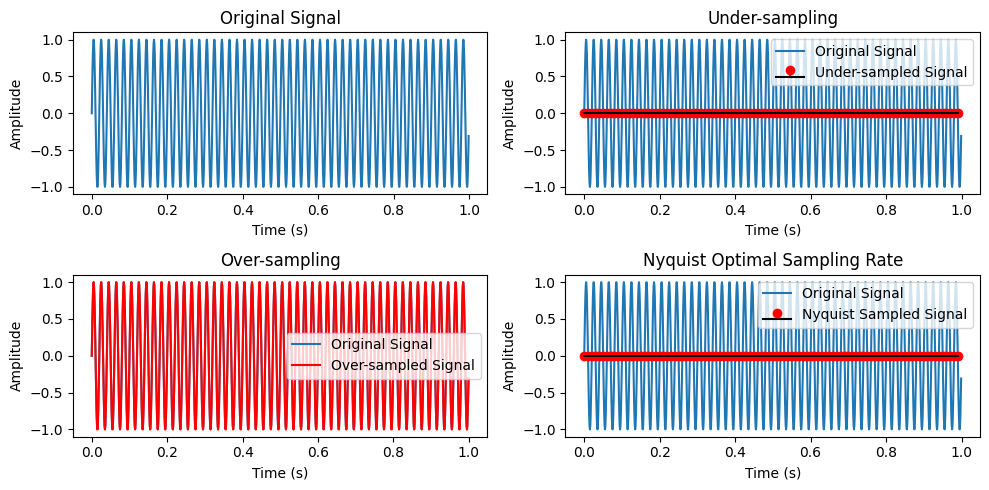

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency (Hz)
f_signal = 50  # Signal frequency (Hz)
duration = 1  # Duration of the signal (s)
t = np.arange(0, duration, 1/fs)  # Time array
signal = np.sin(2 * np.pi * f_signal * t)  # Sine wave signal

# Plot the original signal
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Sampling the signal
def sample_signal(signal, fs, sampling_factor):
    # Downsampling
    downsampled_signal = signal[::sampling_factor]
    return downsampled_signal

# Under-sampling (Lower than Nyquist rate)
fs_under = 100  # Under-sampled frequency
downsampled_signal = sample_signal(signal, fs, fs//fs_under)
t_under = np.arange(0, duration, 1/fs_under)  # Time array for under-sampled signal
plt.subplot(2, 2, 2)
plt.plot(t, signal, label='Original Signal')
plt.stem(t_under, downsampled_signal, 'r', markerfmt='ro', basefmt='k', label='Under-sampled Signal')
plt.title('Under-sampling')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Over-sampling (Higher than Nyquist rate)
fs_over = 2000  # Over-sampled frequency
oversampled_signal = np.interp(np.arange(0, len(signal), fs/fs_over), np.arange(0, len(signal)), signal)
t_over = np.arange(0, duration, 1/fs_over)  # Time array for over-sampled signal
plt.subplot(2, 2, 3)
plt.plot(t, signal, label='Original Signal')
plt.plot(t_over, oversampled_signal, 'r', label='Over-sampled Signal')
plt.title('Over-sampling')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Nyquist optimal sampling rate
fs_nyquist = 2 * f_signal  # Nyquist frequency
t_nyquist = np.arange(0, duration, 1/fs_nyquist)  # Time array for Nyquist sampled signal
nyquist_signal = np.sin(2 * np.pi * f_signal * t_nyquist)  # Nyquist sampled signal
plt.subplot(2, 2, 4)
plt.plot(t, signal, label='Original Signal')
plt.stem(t_nyquist, nyquist_signal, 'r', markerfmt='ro', basefmt='k', label='Nyquist Sampled Signal')
plt.title('Nyquist Optimal Sampling Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
